# Introduction to Curve Fitting Using Python
## David Morgan, Ph.D.
For the Colbert Laboratory at NDSU, with my best wishes. 

This document is an introduction to using Python to accomplish an arbitrary curve-fitting exercise. Python was designed to be easy to read and learn, and I will document the code liberally. It is easy to get help with python by googling around. 

This document is a jupyter notebook. It consists of 'cells' of various kinds. This cell is a 'markdown' cell, and it is used for rendering text. Text can be rendered simply, as in this cell, or in fancier ways, as in the first cell above. If you've written code, or html, or LaTeX, the markdown language is a cinch.<br><br>Double-click a markdown cell to edit it. 'Shift-enter' renders a markdown cell, and executes a code cell. 

## Import necessary functions:

In [1]:
# this is a code cell
# this is a comment in a code cell

# numpy provides high-end math functionality
import numpy as np

# matplotlib.pyplot provides plotting functionality
import matplotlib.pyplot as plt

# gridspec provides advanced figure layouts
from matplotlib import gridspec

# causes matplotlib ouput to integrate with the notebook
%matplotlib inline 

# import the curve fitting routine
from scipy.optimize import curve_fit

# os provides easy access to the file system
import os

## Define and change into the top-level directory

In [2]:
basedir = os.getcwd() 
# or comment out the line above above and uncomment the following 
# two lines to set the directory directly as a file-system appropriate string
# basedir = '/whatever/you/want'
# os.chdir(basedir)

## Simulate arbitrary linear data:

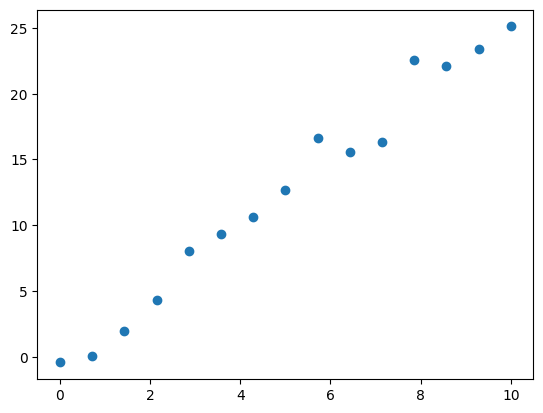

In [3]:
# define a function implementing the equation of a straight line:
def sl(x, m, b):
    return m*x+b

# make 15 points on the x-axis spanning 0 through 10:
x = np.linspace(0,10,15)

# choose values for m and b and compute the y values:
y = sl(x, 2.7, -1.1)

# instantiate a random number generator
rng = np.random.default_rng()

# draw 15 samples from a normal distribution with mean 0 
# and standard deviation 5% of the y-range;
# add the noise to y
y += rng.normal(0, 0.05 * (max(y)-min(y)), 15)

# scatter plot:
plt.scatter(x,y)
plt.show()

## Fit the data:
See [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) for more.

In [4]:
# popt = optimized parameters
# pcov = covariance matrix of parameters

popt, pcov = curve_fit(sl, x, y)
popt

array([ 2.6814094 , -0.85635007])

## Compute residuals:

In [5]:
residuals = y-sl(x, *popt)
residuals

array([ 0.4212063 , -1.03288094, -1.0262725 , -0.5901228 ,  1.25390399,
        0.58853898,  0.01543716,  0.10766745,  2.19480034, -0.81792872,
       -1.96139294,  2.35822976, -0.01869484, -0.64676442, -0.84572716])

## Compute <i>R$^2$</i>:
See [here](https://en.wikipedia.org/wiki/Coefficient_of_determination) for more:
$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$
$$SS_{res}=\sum\limits_{i=1}^{n}(y_i-f(x_i))^2$$
$$SS_{tot}=\sum\limits_{i=1}^{n}(y_i-\bar{y})^2$$

In [6]:
rsq = 1 - np.sum(np.square(residuals))/np.sum(np.square(y-np.mean(y)))
rsq

np.float64(0.9803342701437904)

That's pretty good.

## Make a <i>plot</i> and save it:

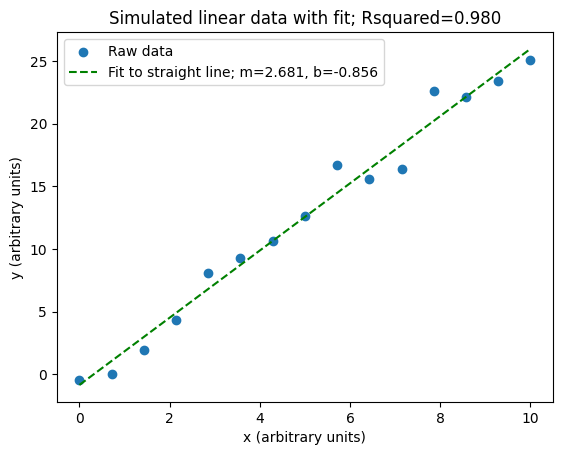

In [7]:
plt.scatter(x,y, label='Raw data')
# in the following line:
# '%0.3f' is a C-style number-format instruction corresponding to
# 'make a column which is '0' characters wide (meaning as many as necessary)
# and which is a 'floating point' (decimal) number with '3' decimal places'
# the '%' roughly translates 'filling in the gaps with the data found in'
# the 'tuple'; a python concept with roughly the meaning 
# 'a collection of several things', 
plt.plot(x, sl(x, *popt), 'g--',
         label='Fit to straight line; m=%0.3f, b=%0.3f' % tuple(popt))
plt.xlabel('x (arbitrary units)')
plt.ylabel('y (arbitrary units)')
plt.title('Simulated linear data with fit; Rsquared=%0.3f' % rsq)
plt.legend()
plt.savefig('/home/david/gh/intro_curve_fitting_python/linear_data/dmm_example_linear_fit.png')
plt.show()

## Make a <i>figure</i> and save it:

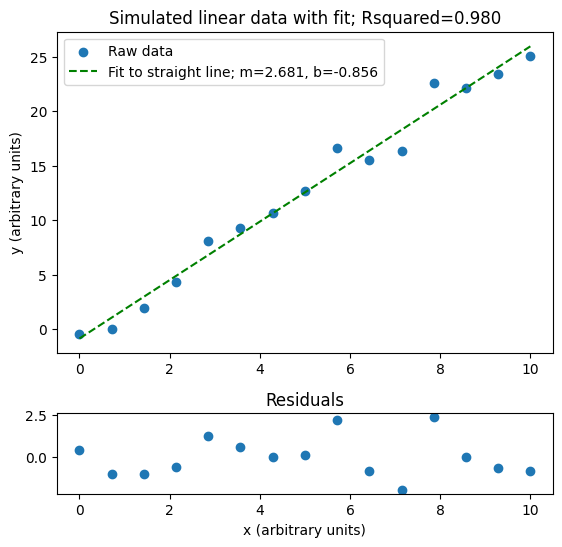

In [8]:
# create a figure
fig = plt.figure()

fig.set_figwidth=(4)
fig.set_figheight(6)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=1, nrows=2,
						hspace=0.3, height_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
ax0.scatter(x,y, label='Raw data')
ax0.plot(x, sl(x, *popt), 'g--',
         label='Fit to straight line; m=%0.3f, b=%0.3f' % tuple(popt))
ax0.set_ylabel('y (arbitrary units)')
ax0.set_title('Simulated linear data with fit; Rsquared=%0.3f' % rsq)
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.set_title('Residuals')
ax1.set_xlabel('x (arbitrary units)')
ax1.scatter(x, residuals)

# display and save the figure
plt.savefig('/home/david/gh/intro_curve_fitting_python/linear_data/dmm_example_linear_fit_with_residuals.png')
plt.show()



## Exercises:
In the '.../intro_curve_fitting_python/linear_data' directory you will find the following files:

In [9]:
# list the contents of the specified directory
os.listdir(basedir+'/linear_data/')

['dmm_example_linear_fit_with_residuals.png',
 'linear2.csv',
 'dmm_example_linear_fit.png',
 'linear1.csv',
 'linear3.csv']

It should not be too difficult to reproduce my work for each of the 'linearx.csv' data sets.<br><br>Here is (one way) to read in a data set; after that, just adapt the work I've done above.

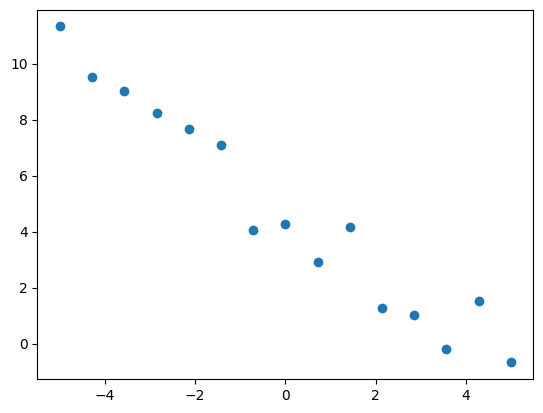

In [10]:
# specify the file name:
fn = basedir+'/linear_data/linear1.csv'

# create empty x and y arrays
x = []
y = []

# open the file as the object 'inf'
inf = open(fn)

# for each line in the file:
for line in inf:
    # cut off the 'newline' character at the end:
    line = line.rstrip()
    # split the line into 'fields' every time you encounter a comma;
    # capture the fields in the array 'la'
    la = line.split(',')
    # turn the first value on the line into a floating point number and
    # append it to the x array
    x.append(float(la[0]))
    # as above, for y
    y.append(float(la[1]))

inf.close()

# make proper np arrays
x=np.array(x)
y=np.array(y)

# scatter plot:
plt.scatter(x,y)
plt.show()

## Your work here:

[Solutions](./linear_solutions.ipynb)

## Exercises with exponentially decaying data:
Click [here](./exponentials.ipynb).